# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Inspect the shapes of the datasets
print(X_train.data.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
print(f'Before one-hot encoding: {y_train[0]}')
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train_ohe[0]}')


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


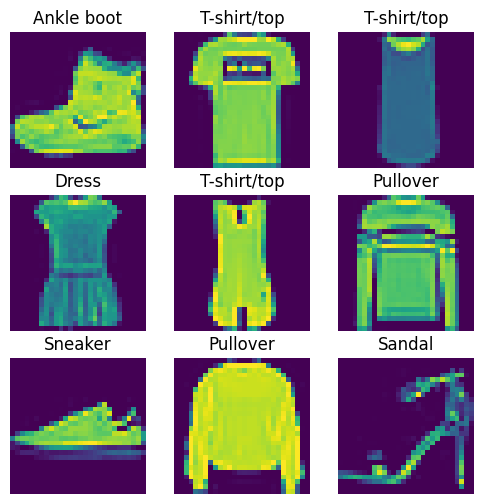

In [22]:
import matplotlib.pyplot as plt
# Verify the data looks as expected
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The data looks as expected with the correct items of clothing shown with the correct labels. However, the photos appear 'green' and the quality is poor. One possible image may be that some items like pullover and shirt may look similar if the shirt is a long-sleeve. Also the photos all have black backgrounds, and in a real environment this may not always be the case.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [26]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten

# Create a simple linear regression model
model = Sequential()

# Input layer
model.add(Input(shape=(28,28))) 
model.add(Flatten())

# You can use `model.add(<layer>)` to add layers to the model
model.add(Dense(128, activation='relu')) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train_ohe, # Training labels
    epochs=10, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test_ohe)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6353 - loss: 1.1357 - val_accuracy: 0.8123 - val_loss: 0.5519
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8153 - loss: 0.5361 - val_accuracy: 0.8294 - val_loss: 0.4822
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8345 - loss: 0.4733 - val_accuracy: 0.8397 - val_loss: 0.4504
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8455 - loss: 0.4384 - val_accuracy: 0.8433 - val_loss: 0.4423
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8542 - loss: 0.4188 - val_accuracy: 0.8435 - val_loss: 0.4275
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8577 - loss: 0.4056 - val_accuracy: 0.8574 - val_loss: 0.4061
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8643 - loss: 0.3883 - val_accuracy: 0.8616 - val_loss: 0.3980
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8655 - loss: 0.3864 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

The baseline model which is just using the SGD optimizer and linear regression modelling performed well with 0.43 loss and 84.13% accuracy, but higher accuracy would be preferred. It compared better than I expected because I did not think 10 epochs would be enough to reach an accuracy more than 80% considering the dataset is complex pictures of clothing, and I did not change the learning rate or momentum of SGD, so considering this it performed well. I think performance is at this level and not even higher because of the optimizer SGD being used, not specifying a momentum, and because we used just 10 epochs.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [33]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Input(shape=(28,28,1))) 
model.add(Conv2D(16, kernel_size=(3,3), activation='relu')) 
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

# Train the model
model.fit(
    X_train, # Training data
    y_train_ohe, # Training labels
    epochs=10, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_ohe)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6921 - loss: 0.9015 - val_accuracy: 0.8248 - val_loss: 0.4932
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8244 - loss: 0.4925 - val_accuracy: 0.8437 - val_loss: 0.4357
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8452 - loss: 0.4388 - val_accuracy: 0.8557 - val_loss: 0.4048
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8590 - loss: 0.3970 - val_accuracy: 0.8596 - val_loss: 0.3868
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8651 - loss: 0.3764 - val_accuracy: 0.8683 - val_loss: 0.3754
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8735 - loss: 0.3480 - val_accuracy: 0.8638 - val_loss: 0.3730
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.8771 - loss: 0.3428 - val_accuracy: 0.8683 - val_loss: 0.3588
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8828 -

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

Yes, the CNN performed better - the loss was lower by ~16% (0.43 to 0.36) and the accuracy increased by ~3% (~84% to 87%). This improvement came from the fact that CNN was used which is better for image classification due to its spatial awareness.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [30]:
# A. Test Hyperparameters
import pandas as pd

filter_options = [32, 64, 128]
results = []

for num_filters in filter_options:
    model = Sequential()
    model.add(Input(shape=(28,28,1))) 
    model.add(Conv2D(num_filters, kernel_size=(3,3), activation='relu')) 
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) 
    model.add(Dense(10, activation='softmax')) 
    
    model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
    )
    
    model.fit(
    X_train, # Training data
    y_train_ohe, # Training labels
    epochs=10, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
    )

    loss, accuracy = model.evaluate(X_test, y_test_ohe)
    results.append({
            'Filters': num_filters,
            'Loss' : loss,
            'Test_Accuracy': accuracy
        })

df_filters = pd.DataFrame(results)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7018 - loss: 0.8758 - val_accuracy: 0.8259 - val_loss: 0.4910
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8272 - loss: 0.4861 - val_accuracy: 0.8382 - val_loss: 0.4489
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8513 - loss: 0.4210 - val_accuracy: 0.8489 - val_loss: 0.4136
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8600 - loss: 0.3934 - val_accuracy: 0.8457 - val_loss: 0.4136
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8707 - loss: 0.3666 - val_accuracy: 0.8707 - val_loss: 0.3613
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.8759 - loss: 0.3405 - val_accuracy: 0.8756 - val_loss: 0.3511
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8801 - loss: 0.3287 - val_accuracy: 0.8757 - val_loss: 0.3434
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8866 -

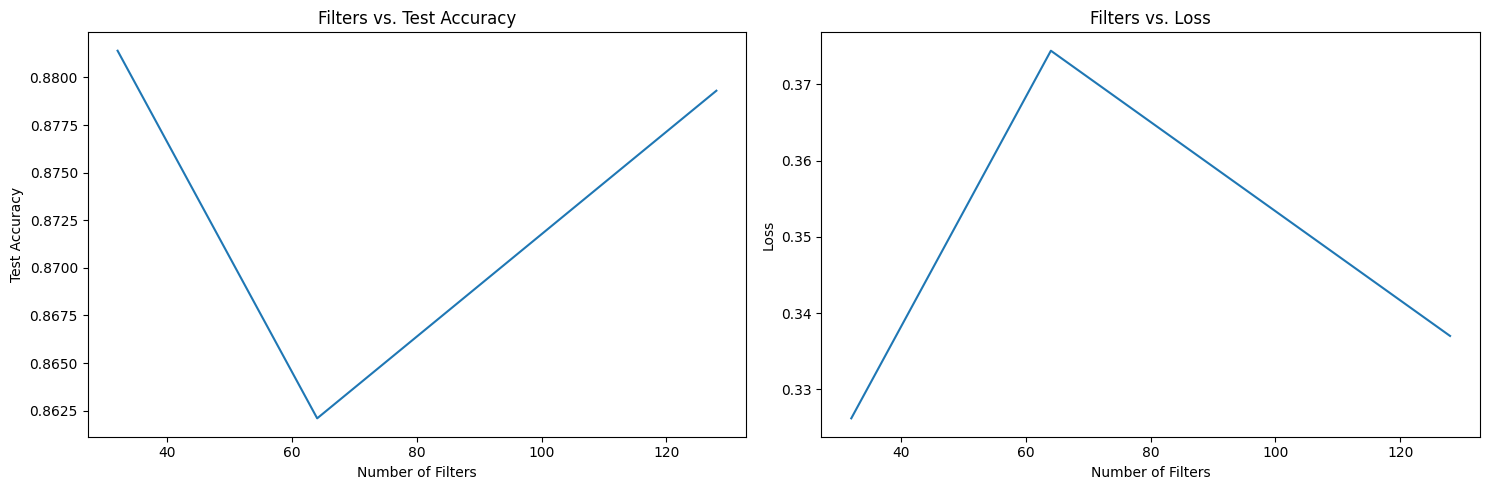

In [32]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(df_filters['Filters'], df_filters['Test_Accuracy'])
ax1.set_title('Filters vs. Test Accuracy')
ax1.set_xlabel('Number of Filters')
ax1.set_ylabel('Test Accuracy')

# Plot Filter Loss
ax2.plot(df_filters['Filters'], df_filters['Loss'])
ax2.set_title('Filters vs. Loss')
ax2.set_xlabel('Number of Filters')
ax2.set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# B. Test presence or absence of regularization
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout
import pandas as pd

dropout_options = [0.0,0.5] #0 is off, 0.5 is 50% dropout
drop_results = []

for options in dropout_options:
    model = Sequential()
    model.add(Input(shape=(28,28,1))) 
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu')) 
    if options > 0:
        model.add(Dropout(options))
        model.add(Flatten())
        model.add(Dense(128, activation='relu')) 
    else:
        model.add(Flatten())
        model.add(Dense(128, activation='relu')) 

    model.add(Dense(10, activation='softmax')) 
    
    model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
    )
    
    model.fit(
    X_train, # Training data
    y_train_ohe, # Training labels
    epochs=10, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
    )

    loss, accuracy = model.evaluate(X_test, y_test_ohe)
    drop_results.append({
            'Dropout': options,
            'Loss' : loss,
            'Test_Accuracy': accuracy
        })

df_dropout = pd.DataFrame(drop_results)

print(df_dropout)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7714 - loss: 0.6475 - val_accuracy: 0.8136 - val_loss: 0.5208
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8328 - loss: 0.4666 - val_accuracy: 0.8368 - val_loss: 0.4509
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8503 - loss: 0.4216 - val_accuracy: 0.8487 - val_loss: 0.4236
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8605 - loss: 0.3897 - val_accuracy: 0.8588 - val_loss: 0.3961
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8677 - loss: 0.3684 - val_accuracy: 0.8649 - val_loss: 0.3774
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8732 - loss: 0.3498 - val_accuracy: 0.8703 - val_loss: 0.3533
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8801 - loss: 0.3338 - val_accuracy: 0.8759 - val_loss: 0.3487
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8845 - loss: 0.3189 - 

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Using 32 filters or 128 filters and adding dropout improved model performance. The increased number of filters of 32 or 128 were an improvement from the original 16, but the dip at 64 might be an awkward combination of filters and epochs. The improvement due to dropout indicates the model was overfit, so restricting the neurons helped the model actually learn and perform better. The best combination based on the testing will likely be 32 filters and 0.5 dropout.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [8]:
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout
import pandas as pd

model = Sequential()
model.add(Input(shape=(28,28,1))) 
model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax')) 
    
model.compile(
loss='categorical_crossentropy', # Loss function
optimizer='sgd', # Optimizer
metrics=['accuracy'] # Metrics to evaluate the model
)
    
model.fit(
X_train, # Training data
y_train_ohe, # Training labels
epochs=10, # Number of epochs
batch_size=32, # Number of samples per batch
validation_split=0.2 # Use 20% of the data for validation
)

loss, accuracy = model.evaluate(X_test, y_test_ohe)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7562 - loss: 0.6851 - val_accuracy: 0.8259 - val_loss: 0.4914
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8219 - loss: 0.4978 - val_accuracy: 0.8340 - val_loss: 0.4686
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8397 - loss: 0.4502 - val_accuracy: 0.8492 - val_loss: 0.4169
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8524 - loss: 0.4157 - val_accuracy: 0.8585 - val_loss: 0.4013
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8604 - loss: 0.3898 - val_accuracy: 0.8661 - val_loss: 0.3715
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8665 - loss: 0.3691 - val_accuracy: 0.8733 - val_loss: 0.3618
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8720 - loss: 0.3518 - val_accuracy: 0.8725 - val_loss: 0.3484
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8780 - loss: 0

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

This final model performed better than baseline and all the CNN model tests. The combination of using CNN, 32 filters, and dropout added enough complexity to the model without overfit. If I had time, other tests I would perform include using another optimizer like Adam or adding another layer.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.